# Logistic Regression

## Introduction

In this exercise, you will build a logistic regression model to predict whether a student gets admitted into a university. Suppose that you are the administrator of a university department and you want to determine each applicant's chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant's scores on two exams and the admissions decision.

Your task is to build a classification model that estimates an applicant's probability of admission based the scores from those two exams.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load data 
data = np.loadtxt('../data/ex2data1.txt', delimiter=',')
print("First 10 examples from the dataset:")
print(data[1:10,])

# The first two columns contains the exam scores and the third column
# contains the label.
X = np.c_[data[:,[0,1]]]
y = np.c_[data[:,2]]

First 10 examples from the dataset:
[[ 30.28671077  43.89499752   0.        ]
 [ 35.84740877  72.90219803   0.        ]
 [ 60.18259939  86.3085521    1.        ]
 [ 79.03273605  75.34437644   1.        ]
 [ 45.08327748  56.31637178   0.        ]
 [ 61.10666454  96.51142588   1.        ]
 [ 75.02474557  46.55401354   1.        ]
 [ 76.0987867   87.42056972   1.        ]
 [ 84.43281996  43.53339331   1.        ]]


## Visualizing the data

Before starting to implement any learning algorithm, it is always good to visualize the data if possible.

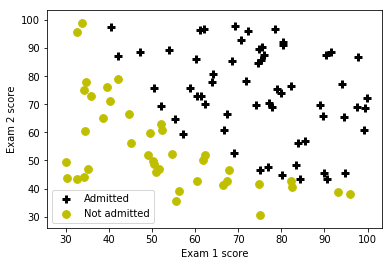

In [18]:
# plotting function
def plotData(X, y, label_x, label_y, label_pos, label_neg):
    """
    PLOTDATA Plots the data points X and y into a new figure 
    PLOTDATA(x,y) plots the data points with + for the positive examples
    and o for the negative examples. X is assumed to be a Mx2 numpy array.

    """
    # Get indexes for class 0 and class 1
    neg = np.squeeze(y == 0)
    pos = np.squeeze(y == 1)
    
    # plot examples
    axes = plt.gca()
    axes.scatter(x = X[pos, 0], y = X[pos, 1], c= 'black', marker= '+', s=60,
                linewidth=3, label=label_pos)
    axes.scatter(x = X[neg, 0], y = X[neg, 1], c='y', s=60, marker = 'o',
                label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True)


plotData(X, y, label_x =  'Exam 1 score', label_y = 'Exam 2 score',
         label_pos = 'Admitted', label_neg = 'Not admitted')

## Implementation

### Sigmoid function

Before you start with the actual cost function, recall that the logistic regression hypothesis is defined as:

$$ h_\theta (x) =  g ( \theta^T x ) \\ 
z = \theta^T x \\
g(z) = \frac{1}{1 + e^{-z}} $$ 

Your first step is to implement this function in sigmoid so it can be called by the rest of your program.

In [19]:
def sigmoid(z):
    """
    SIGMOID Compute sigmoid function
    SIGMOID(z) computes the sigmoid of z.
    """
    return 1/(1 + np.exp(-z))

## Cost function and gradient

Now you will implement the cost function and gradient for logistic regression. Complete the code in costFunction to return the cost and gradient.

Recall that the cost function in logistic regression is:

$$J(\theta) = - \frac{1}{m} \displaystyle \sum_{i=1}^m [y^{(i)}\log (h_\theta (x^{(i)})) + (1 - y^{(i)})\log (1 - h_\theta(x^{(i)}))]$$

and the gradient of the cost is a vector of the same length as $\theta$ where the $j^{th}$ element (for j = 0, 1, ..., n) is defined as follows:

$$ \frac{\partial J(\theta)}{\partial \theta_j}  = \frac{1}{m}\sum_{i=1}^m \left [ h_\theta(x^{(i)}) - y^{(i)} \right ] x^{(i)}_j $$

Note that while this gradient looks identical to the linear regression gradient, the formula is actually different because linear and logistic regression have different definitions of $h_\theta(x)$.

In [20]:
def costFunction(theta, X, y):
    """
    COSTFUNCTION Compute cost for logistic regression
    J = COSTFUNCTION(theta, X, y) computes the cost of using theta as the
    parameter for logistic regression
    """
    
    m = y.size  
    hetta = sigmoid(X.dot(theta)).reshape(y.shape)
    J = 1/m * np.sum(-y * np.log(hetta) - (1-y) * np.log(1-hetta), axis = 0)

    # if cost is nan return Inf
    if np.isnan(J[0]):
        return(np.inf)
    return J[0]

def gradFunction(theta, X, y):
    """
    GRADFUNCTION Compute gradient for logistic regression
    gradFunction = GRADFUNCTION(theta, X, y) computes gradient of the cost
    for logistic regression w.r.t. to the parameters.

    """
    m = y.size  
    hetta = sigmoid(X.dot(theta))   
    hetta = sigmoid(X.dot(theta)).reshape(y.shape)
    grad = 1/m * np.sum((hetta - y)*(X), axis = 0)
    return grad

Using the initial parameters of $\theta = 0$ you should see that the cost is about 0.693.

In [21]:
# Setup the data matrix appropriately, and add ones for the intercept term
m, n = X.shape

# Add intercept term to x
X = np.c_[np.ones(X.shape[0]), X]

# Initialize fitting parameters
initial_theta = np.zeros(X.shape[1])

# Compute and display initial cost and gradient
cost = costFunction(initial_theta, X, y)
grad = gradFunction(initial_theta, X, y)
print('Cost at initial theta (zeros):', str(cost));
print('Gradient at initial theta (zeros): \n');
print(grad)

Cost at initial theta (zeros): 0.69314718056
Gradient at initial theta (zeros): 

[ -0.1        -12.00921659 -11.26284221]


## Learning parameters using optimization

In the previous assignment, you found the optimal parameters of a linear regression model by implementing gradent descent. You wrote a cost function and calculated its gradient, then took a gradient descent step accordingly.
This time, instead of taking gradient descent steps, you will use an scipy built-in function.

In [22]:
from scipy.optimize import minimize

# supress warnings from optimization
import warnings
warnings.simplefilter("ignore")

optim = minimize(fun = costFunction, x0=initial_theta, args=(X,y), 
                 method='BFGS', jac=gradFunction,
                 options={'maxiter':400})

print('Cost for optimal parameters = ', str(optim.fun))

Cost for optimal parameters =  0.2034977015895099


If you have completed the costFunction correctly, minimize will converge on the right optimization parameters and return the final values of the cost and $\theta$. You should see that the cost is about 0.203.

Notice that by using minimize, you did not have to write any loops yourself, or set a learning rate like you did for gradient descent. This is all done by minimize: you only needed to provide a function calculating the cost and the gradient.

The optimal parameters will then be used to plot the decision boundary on the training data.

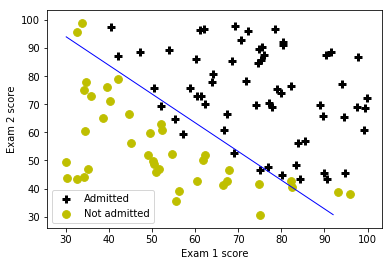

In [24]:
# plot data and linear boundary

plotData(X[:,[1,2]], y, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted')

x1_min, x1_max = X[:,1].min(), X[:,1].max(),
x2_min, x2_max = X[:,2].min(), X[:,2].max(),

xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))

h = sigmoid(np.c_[np.ones((xx1.ravel().shape[0],1)), xx1.ravel(), xx2.ravel()].dot(optim.x))
h = h.reshape(xx1.shape)

plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='b')
plt.show()